In [1]:
import sys
import os

sys.path.insert(0, ('/').join(os.getcwd().split('/')[:-1]))
from py_wave_propagator import free_space_prop
from py_wave_propagator import volume_prop as volume_prop
from py_wave_propagator import torch_volume_prop as Tvolume_prop

import torch
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.ndimage import gaussian_filter, median_filter
import h5py

# Repeating v1_prop_AS with pytorch functions

0. Simple propagation to parallel plane

## 0. Simple propagation to parallel plane

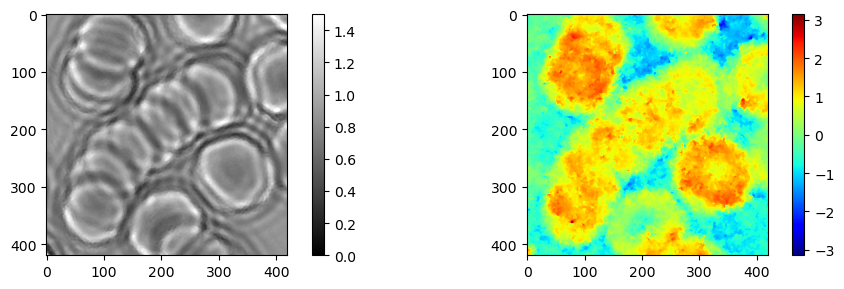

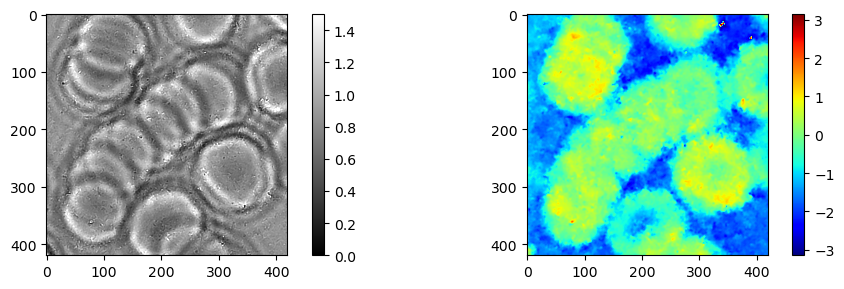

In [7]:
wl = 532*1e-9
Nx = Ny = 420
dx = dy = 6.45e-6

# sample
sample_name = '../outputs/Reconstruction/blood_01_01.mat'
A = np.array(h5py.File(sample_name, 'r').get('A'))[200:620, 200:620]
P = gaussian_filter(2*np.pi/wl*np.array(h5py.File(sample_name, 'r').get('phi'))*6.45e-6**2/1.43e-3, 0.003)[200:620, 200:620] # phase in radians

wave_0 = A*np.exp(1j*P)
wave_0 = wave_0.T

wave_z1 = volume_prop.propagate(
    wave_0, wl, [dx, dy], 500e-6, padding=210, direction='forward', bandlimited=False
    )

fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
cp_amp = axs[0].imshow(np.abs(wave_0)**2, vmax=1.5, vmin=0., cmap='gray')
cp_ang = axs[1].imshow((np.angle(wave_0)), vmin=-1*np.pi, vmax=np.pi, cmap='jet')

plt.colorbar(cp_amp, ax=axs[0])
plt.colorbar(cp_ang, ax=axs[1])

plt.show()


fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
cp_amp = axs[0].imshow(np.abs(wave_z1)**2, vmax=1.5, vmin=0., cmap='gray')
cp_ang = axs[1].imshow(np.angle(wave_z1), vmin=-1*np.pi, vmax=np.pi, cmap='jet')

plt.colorbar(cp_amp, ax=axs[0])
plt.colorbar(cp_ang, ax=axs[1])

plt.show()

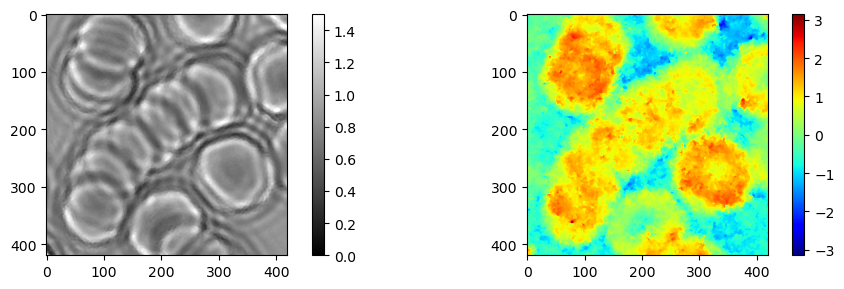

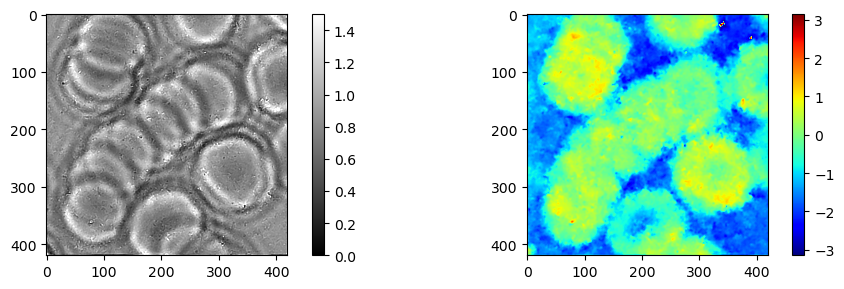

In [8]:
wl = 532*1e-9
Nx = Ny = 420
dx = dy = 6.45e-6

# sample
sample_name = '../outputs/Reconstruction/blood_01_01.mat'
A = np.array(h5py.File(sample_name, 'r').get('A'))[200:620, 200:620]
P = gaussian_filter(2*np.pi/wl*np.array(h5py.File(sample_name, 'r').get('phi'))*6.45e-6**2/1.43e-3, 0.003)[200:620, 200:620] # phase in radians

wave_0 = torch.tensor(A)*torch.exp(1j*torch.tensor(P))
wave_0 = wave_0.T

wave_z1 = Tvolume_prop.propagate(
    wave_0, wl, [dx, dy], torch.tensor(500e-6), padding=0, direction='forward', bandlimited=False
    )

fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
cp_amp = axs[0].imshow(np.abs(wave_0)**2, vmax=1.5, vmin=0., cmap='gray')
cp_ang = axs[1].imshow((np.angle(wave_0)), vmin=-1*np.pi, vmax=np.pi, cmap='jet')

plt.colorbar(cp_amp, ax=axs[0])
plt.colorbar(cp_ang, ax=axs[1])

plt.show()


fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
cp_amp = axs[0].imshow(np.abs(wave_z1)**2, vmax=1.5, vmin=0., cmap='gray')
cp_ang = axs[1].imshow(np.angle(wave_z1), vmin=-1*np.pi, vmax=np.pi, cmap='jet')

plt.colorbar(cp_amp, ax=axs[0])
plt.colorbar(cp_ang, ax=axs[1])

plt.show()